# Build a basic CNN on MNIST data

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")

# Basic bread and butter imports

In [3]:
import numpy as np
#np.random.seed(13)
import random 
import pandas as pd

In [4]:
from keras import backend as K
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten, Conv2D
from keras.utils import np_utils
from keras.preprocessing import sequence

from keras import callbacks as keras_callbacks

Using TensorFlow backend.
/home/root1/.virtualenv/demos/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Lets load the data first 

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print X_train.shape
print y_train.shape

print X_test.shape
print y_test.shape

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## let us vizualize what it is

In [6]:
random_indexes = random.sample(range(0, X_train.shape[0]), 5)

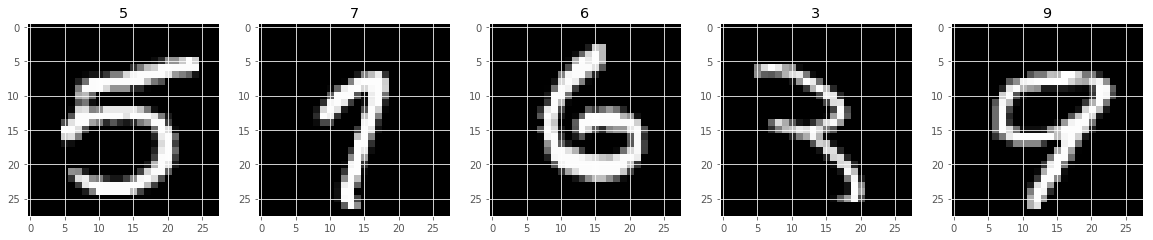

In [7]:
plt.figure(figsize=(20,20))

for c,i in enumerate(random_indexes): 
    plt.subplot(2,len(random_indexes),c+1)
    plt.imshow(X_train[i], interpolation="nearest", cmap="gray")
    plt.title(y_train[i])
    #plt.imshow(X_train[i])
plt.show()


# basic Initalizations

In [8]:
img_rows, img_cols = 28, 28
nb_classes = 10

nb_filters = 5 # the number of filters
nb_pool = 2 # window size of pooling
nb_conv = 3 # window size of filter

In [9]:
print type(X_train)
X_train.shape

<type 'numpy.ndarray'>


(60000, 28, 28)

# Preprocess the data

In [10]:
#X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols) 
#X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

# reshape it as 4D-tensor - 4th dimansion is number of channels -RGB ?
X_train = X_train.reshape(X_train.shape[0], img_cols, img_rows, 1) 
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows, 1)

# before we squash values between 0-1, convert it to float type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#convert to grayscale - squash all values between 0-1
X_train /= 255 
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


('X_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


# Network 

In [11]:
epochs = 3

model = Sequential()

# add convolution layers

model.add(Conv2D(filters=nb_filters, kernel_size=(nb_conv, nb_conv), input_shape=(img_cols, img_rows, 1)))
model.add(Activation('relu'))
#model.add(Convolution2D(nb_filters, nb_conv, nb_conv))

model.add(Conv2D(filters=nb_filters, kernel_size=(nb_conv, nb_conv)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))

# dense layers for classification           
          
model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

### # Lets try to utilize tensorboard to visualize stuff - to do so we leverage callbacks

In [12]:
# model is looged at ./Graph

tb_CallBack = keras_callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

# Lets see the network architecture

There are various ways to do this:

    tensor board
    keras ways 

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 5)         50        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 5)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 5)         230       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 5)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 5)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 720)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               92288     
__________

In [14]:
from IPython.display import SVG
from matplotlib import pyplot as plt
plt.style.use("ggplot")

from keras.utils.vis_utils import model_to_dot


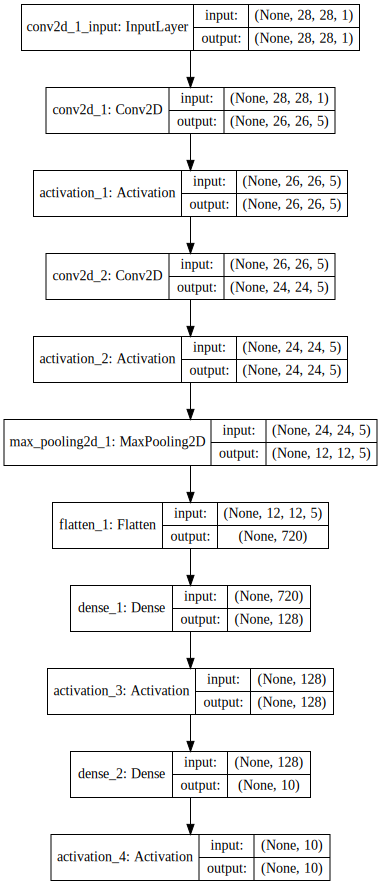

In [15]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# Compile and train the model

In [16]:
model.compile(loss='categorical_crossentropy', optimizer="adadelta", metrics=['accuracy'])


history = model.fit(X_train, Y_train, epochs=epochs, batch_size=256, verbose=2,  
                    validation_split=0.2, callbacks=[tb_CallBack])

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
10s - loss: 0.6176 - acc: 0.8208 - val_loss: 0.2481 - val_acc: 0.9272
Epoch 2/3
10s - loss: 0.2013 - acc: 0.9407 - val_loss: 0.1700 - val_acc: 0.9496
Epoch 3/3
10s - loss: 0.1420 - acc: 0.9573 - val_loss: 0.1226 - val_acc: 0.9637


# Visualize training, test - accuracies and loss 

- We can either do this via tensorboard
    + Open terminal
    + Get complete path to ./Graph
    + Run "tensorboard --logdir=<Complete path to ./Graph>"
    
- Or do it crudely 
    + Crude method is given below
    

In [17]:
# let see training and test accuracies

['acc', 'loss', 'val_acc', 'val_loss']


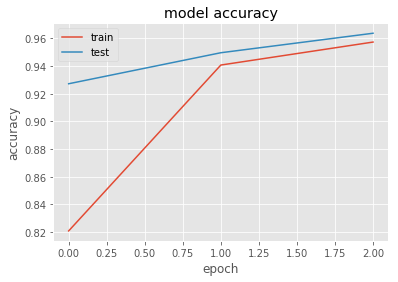

In [18]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.ylim([0.9,1.0])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
# let see training and test loss

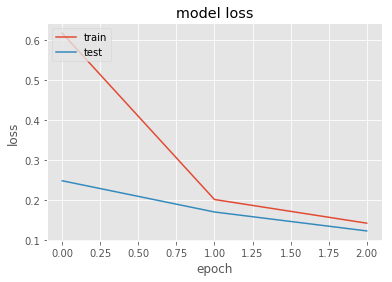

In [20]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Run the model on test set
    Get cumilative accuracy score
    Get predictions on every data point in test set

In [21]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

 9760/10000 [============================>.] - ETA: 0s()
('Test accuracy: ', 0.9657)


In [22]:
predictions = model.predict_classes(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub

 9888/10000 [============================>.] - ETA: 0s

,Actual,Predictions
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


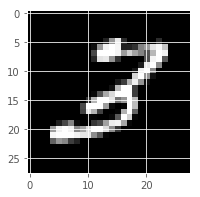

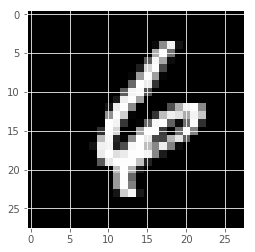

In [23]:
# test set is not so easy

plt.figure(figsize=(3,3))

plt.imshow(X_test[9975].reshape(28,28), interpolation="nearest", cmap="gray")
plt.show()

plt.imshow(X_test[9976].reshape(28,28), interpolation="nearest", cmap="gray")
plt.show()

# Lets decipher the model

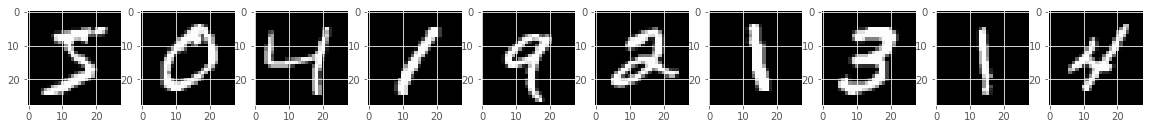

In [24]:
show_size = 10

num_rows = 1
num_cols = show_size

plt.figure(figsize=(20,20))

for j in range(num_cols):
    plt.subplot(num_rows, num_cols, j+1)
    plt.imshow(X_train[j].reshape(28,28), interpolation="nearest", cmap="gray")
plt.show()

## Visualize layer 1

In [25]:
get_first_layer_output = K.function([model.layers[0].input],[model.layers[1].output])

first_layer_output = get_first_layer_output([X_train[0:show_size]])[0]

first_layer_output.shape

(10, 26, 26, 5)

In [26]:
def plotNNfilter(units):
    
    num_of_filters = units.shape[3]
    
    n_rows = units.shape[0]
    n_columns = num_of_filters
    
    for i in range(n_rows):
        plt.figure(figsize=(20,20))
        for j in range(n_columns):
            plt.subplot(n_rows, n_columns, j+1)
            plt.title("Filter = %s" %i)
            plt.imshow(units[i,:,:,j], interpolation="nearest", cmap="gray")
        plt.show()


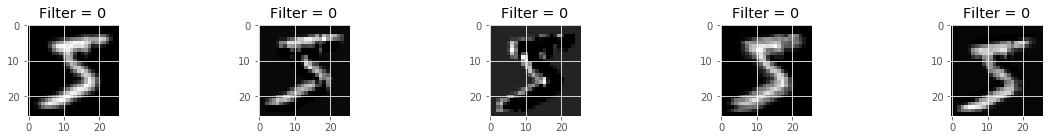

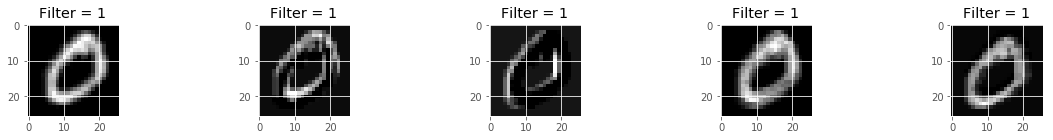

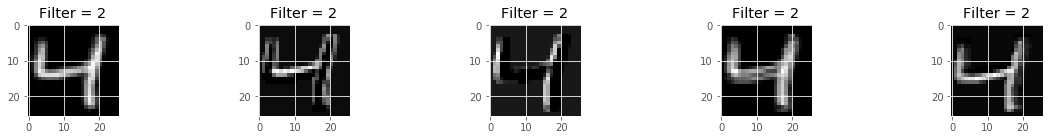

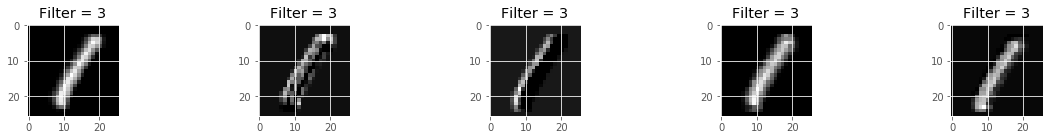

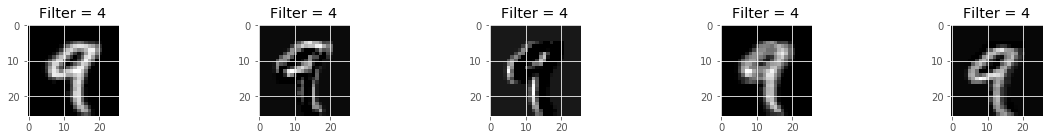

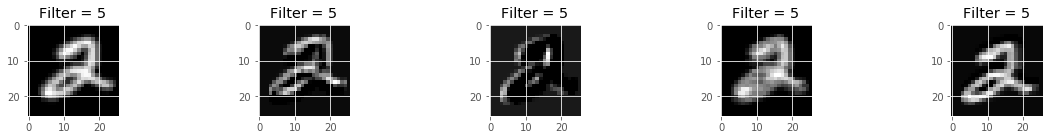

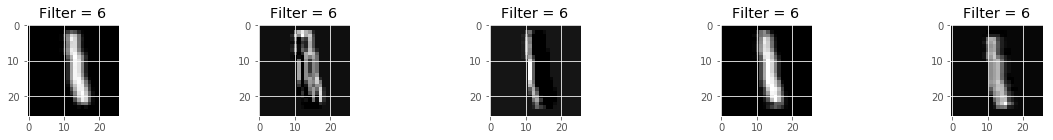

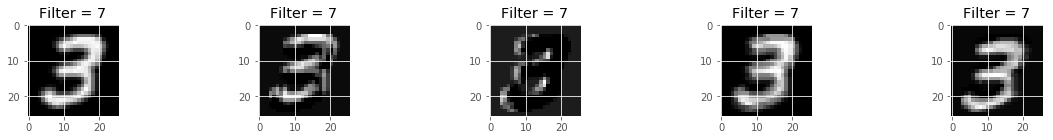

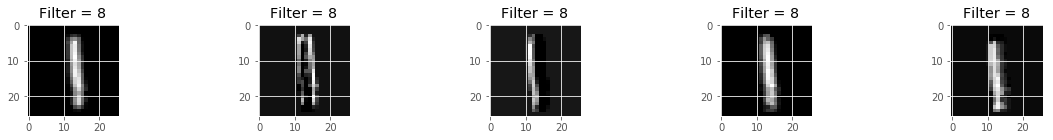

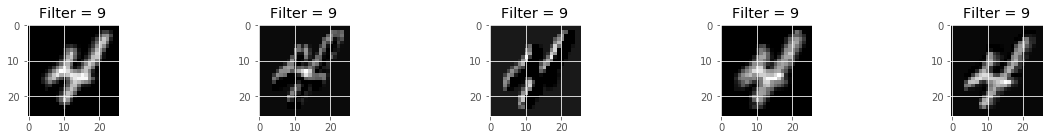

In [27]:
plotNNfilter(first_layer_output)

## Visualize layer 2

In [28]:
get_second_layer_output = K.function([model.layers[0].input],[model.layers[3].output])

second_layer_output = get_second_layer_output([X_train[0:show_size]])[0]

second_layer_output.shape

(10, 24, 24, 5)

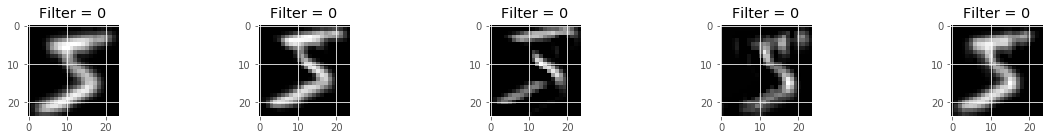

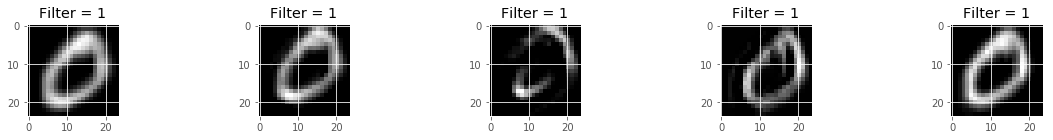

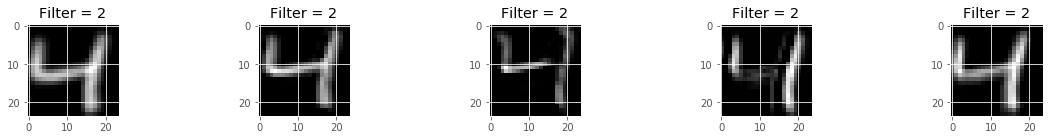

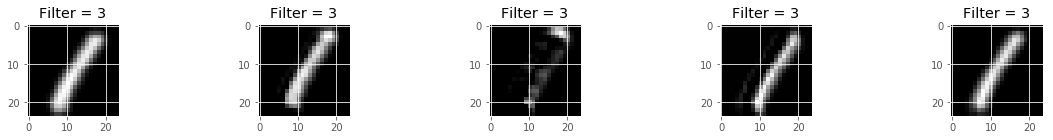

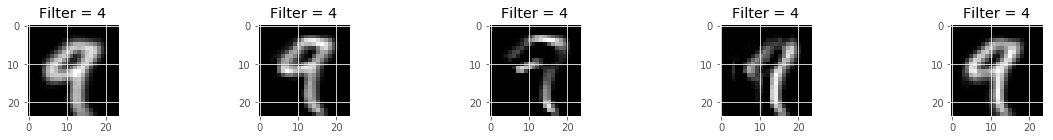

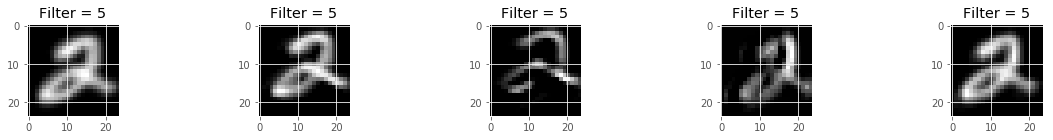

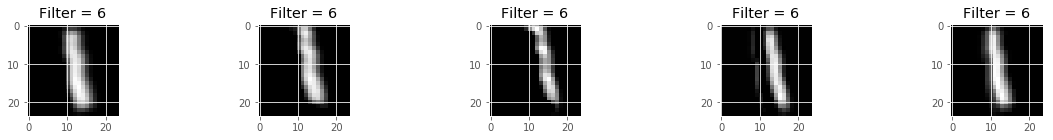

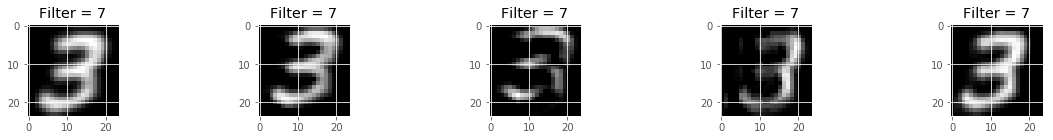

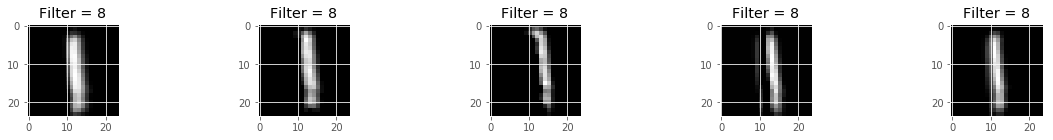

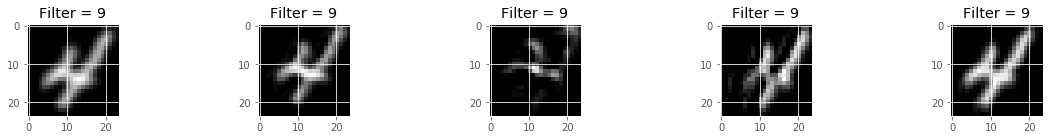

In [29]:
plotNNfilter(second_layer_output)

## Visualize layer 3

In [30]:
get_3rd_layer_output = K.function([model.layers[0].input], [model.layers[4].output])

third_layer_output = get_3rd_layer_output([X_train[0:show_size]])[0]

third_layer_output.shape

(10, 12, 12, 5)

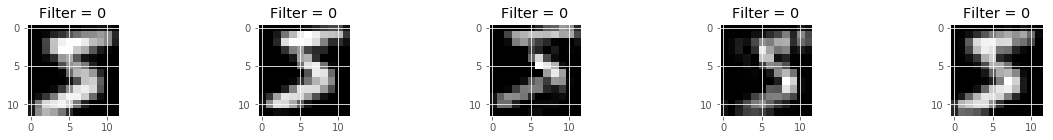

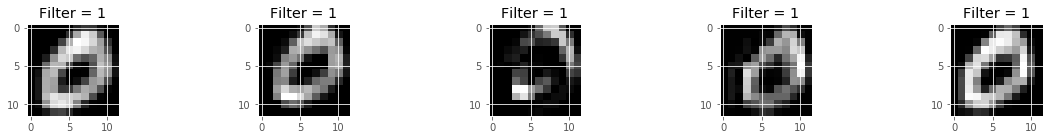

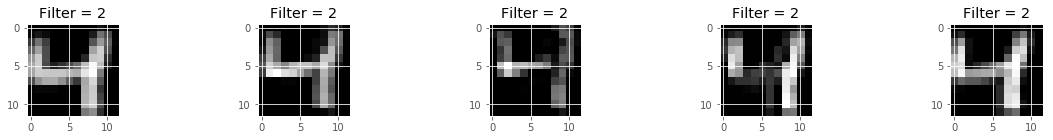

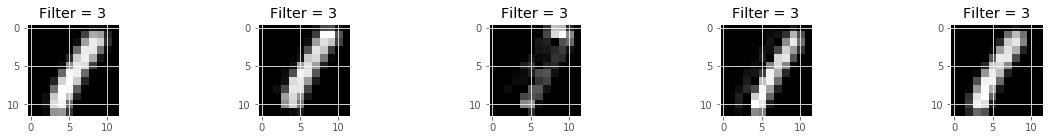

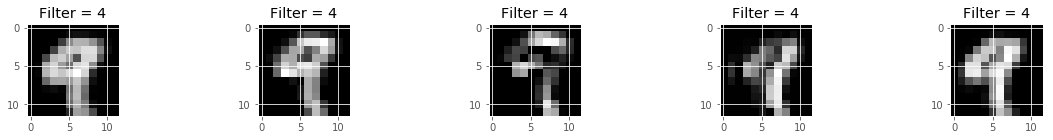

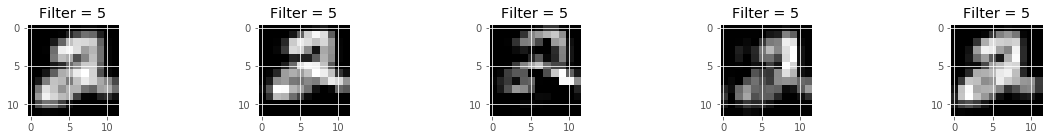

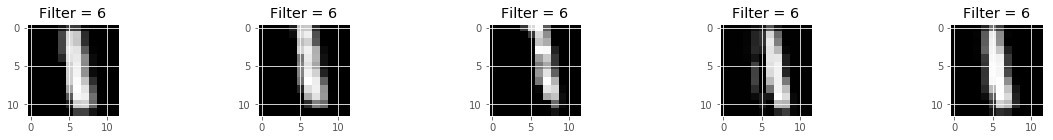

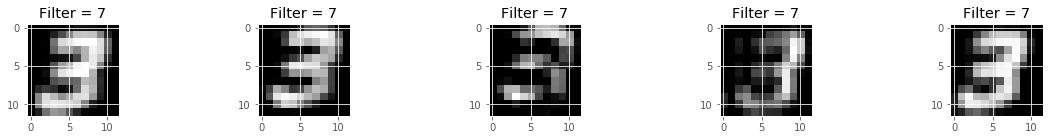

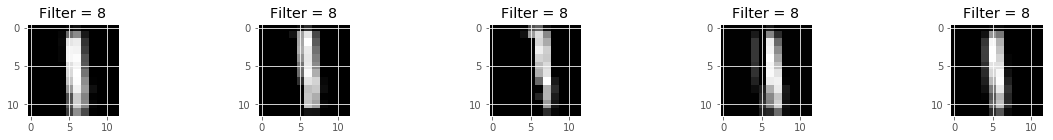

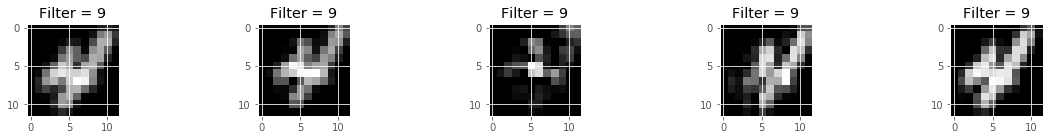

In [31]:
plotNNfilter(third_layer_output)